In [61]:
query="""
SELECT
  primary_type,
  timestamp AS time,
  clearance_status AS clr,
  location,
  zipcode,
  year
FROM
  `bigquery-public-data.austin_crime.crime`
ORDER BY 
  time
"""
import google.cloud.bigquery as bq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
client = bq.Client()

# Preview the dataset.

In [16]:
dataset_ref = client.dataset('austin_crime', project = 'bigquery-public-data' ) 

In [19]:
dataset = client.get_dataset(dataset_ref)

In [20]:
tables = list(client.list_tables(dataset))
for table in tables:  
    print(table.table_id)

crime


In [21]:
table_ref = dataset_ref.table("crime")

In [22]:
table = client.get_table(table_ref)

In [23]:
table.schema

[SchemaField('unique_key', 'INTEGER', 'NULLABLE', 'Unique identifier for the record.', ()),
 SchemaField('address', 'STRING', 'NULLABLE', 'Full address where the incident occurred.', ()),
 SchemaField('census_tract', 'FLOAT', 'NULLABLE', '', ()),
 SchemaField('clearance_date', 'TIMESTAMP', 'NULLABLE', '', ()),
 SchemaField('clearance_status', 'STRING', 'NULLABLE', '', ()),
 SchemaField('council_district_code', 'INTEGER', 'NULLABLE', 'Indicates the council district code where the incident occurred.', ()),
 SchemaField('description', 'STRING', 'NULLABLE', 'The subcategory of the primary description.', ()),
 SchemaField('district', 'STRING', 'NULLABLE', 'Indicates the police district where the incident occurred.', ()),
 SchemaField('latitude', 'FLOAT', 'NULLABLE', '', ()),
 SchemaField('longitude', 'FLOAT', 'NULLABLE', '', ()),
 SchemaField('location', 'STRING', 'NULLABLE', '', ()),
 SchemaField('location_description', 'STRING', 'NULLABLE', 'Description of the location where the incident 

In [24]:
client.list_rows(table, max_results=5).to_dataframe()

,unique_key,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,longitude,location,location_description,primary_type,timestamp,x_coordinate,y_coordinate,year,zipcode
0,2015150483,"Austin, TX",None,2015-01-27 00:00:00+00:00,Not cleared,None,RAPE,B,None,None,None,None,Rape,2015-01-15 00:00:00+00:00,None,None,2015,None
1,20151542027,"Austin, TX",None,2015-07-24 00:00:00+00:00,Not cleared,None,RAPE,D,None,None,None,None,Rape,2015-06-03 00:00:00+00:00,None,None,2015,None
2,20152001758,"Austin, TX",None,2015-08-15 00:00:00+00:00,Not cleared,None,RAPE,F,None,None,None,None,Rape,2015-07-19 00:00:00+00:00,None,None,2015,None
3,20151340282,"Austin, TX",None,2015-06-15 00:00:00+00:00,Cleared by Exception,None,RAPE,UK,None,None,None,None,Rape,2015-05-14 00:00:00+00:00,None,None,2015,None
4,20151871268,"Austin, TX",None,2015-10-27 00:00:00+00:00,Not cleared,None,RAPE,UK,None,None,None,None,Rape,2015-07-06 00:00:00+00:00,None,None,2015,None


# Getting the dataset.

In [79]:
query_job = client.query(query)  # Make an API request.

In [78]:
df_data = query_job.to_dataframe()
df_data.head()

,primary_type,time,clr,location,zipcode,year
0,Theft: All Other Larceny,2014-01-01 00:00:00+00:00,Not cleared,"(30.293954,-97.734204)",78705,2014
1,Aggravated Assault,2014-01-01 00:00:00+00:00,Not cleared,"(30.276405,-97.733982)",78701,2014
2,Robbery,2014-01-01 00:00:00+00:00,Cleared by Exception,None,78701,2014
3,Robbery,2014-01-01 00:00:00+00:00,Not cleared,None,78703,2014
4,Theft: All Other Larceny,2014-01-01 00:00:00+00:00,Not cleared,"(30.26716,-97.739585)",78701,2014


In [84]:
df_data.describe()

,year
count,116675.000000
mean,2014.972745
std,0.817717
min,2014.000000
25%,2014.000000
50%,2015.000000
75%,2016.000000
max,2016.000000


In [96]:
df_zip = df_data.zipcode[pd.isnull(df_data.zipcode)==False]

In [114]:
df_zip = df_zip.astype('int32');

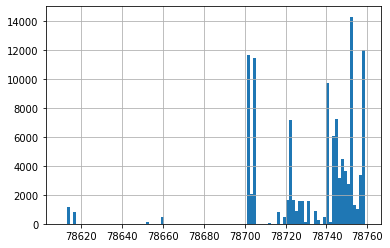

In [153]:
df_zip.hist(bins = 100)

In [159]:
df_zip.min()

78610